In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_csv("Q1_Table.csv", header=None)

print(df)

     0    1       2
0   1n  200  1202.0
1   1n  115   898.0
2   1n  423  1277.0
3   1n  152  1071.0
4   1n  122   942.0
5   1n  148   960.0
6   1n  623  1393.0
7   2n   30   187.0
8   2n   32   158.4
9   2n   56   353.0
10  2n  103   436.0
11  2n   46   246.4
12  1n   46   250.0
13  2n   47   231.0
14  1n   98   330.0
15  1n   98   417.0
16  1n   50   265.0
17  1n   50   290.4
18  1n   90   440.0
19  1n   14    60.0


In [3]:
df_haploid = df[df[0] == "1n"]
df_diploid = df[df[0] == "2n"]

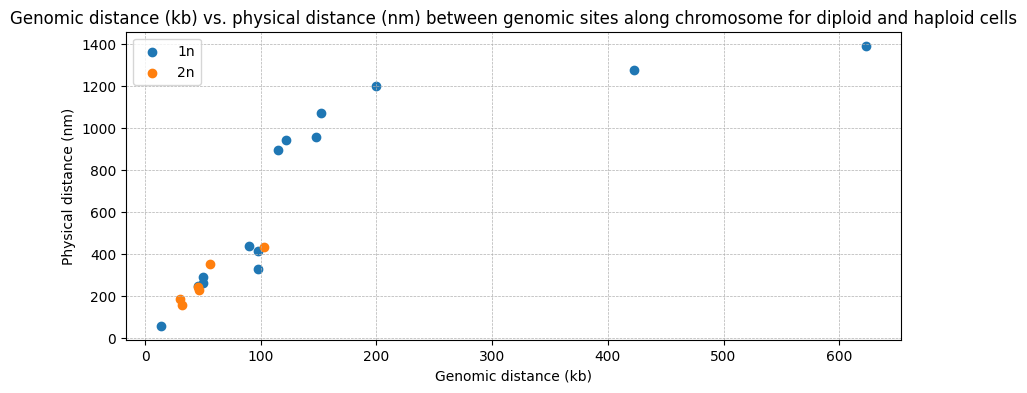

In [4]:
plt.figure(figsize=(10,4))
plt.scatter(df_haploid[1], df_haploid[2], label="1n", marker="o")
plt.scatter(df_diploid[1], df_diploid[2], label="2n", marker="o")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.xlabel("Genomic distance (kb)")
plt.ylabel("Physical distance (nm)")

plt.title("Genomic distance (kb) vs. physical distance (nm) between genomic sites along chromosome for diploid and haploid cells")
plt.legend()

In [5]:
a=340
genomic_distance_range = np.linspace(df[1].min(), df[1].max(), 500) 
N = genomic_distance_range
D_predicted = a * np.sqrt(N)

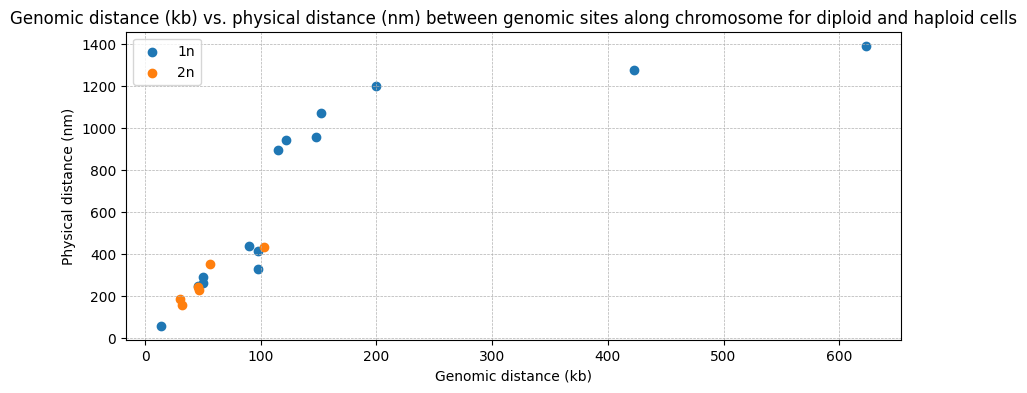

In [6]:
plt.figure(figsize=(10,4))
plt.scatter(df_haploid[1], df_haploid[2], label="1n", marker="o")
plt.scatter(df_diploid[1], df_diploid[2], label="2n", marker="o")
# plt.plot(genomic_distance_range, D_predicted, label="Prediction (D = a√N)", color="black", linestyle="--", linewidth=2)


plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.xlabel("Genomic distance (kb)")
plt.ylabel("Physical distance (nm)")

plt.title("Genomic distance (kb) vs. physical distance (nm) between genomic sites along chromosome for diploid and haploid cells")
plt.legend()
plt.show()

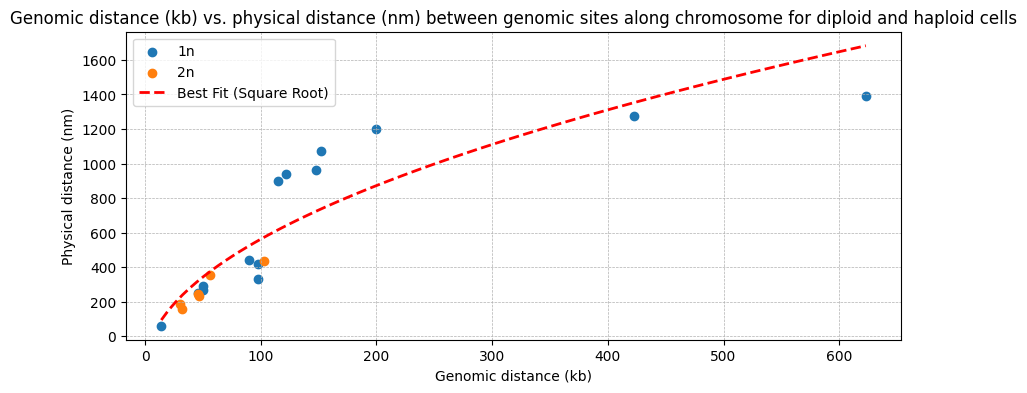

In [8]:

# Define the square root function
def sqrt_model(x, a, b):
    return a * np.sqrt(x) + b

x_data = np.concatenate((df_haploid[1], df_diploid[1]))
y_data = np.concatenate((df_haploid[2], df_diploid[2]))

params, _ = curve_fit(sqrt_model, x_data, y_data)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = sqrt_model(x_fit, *params)

plt.figure(figsize=(10, 4))
plt.scatter(df_haploid[1], df_haploid[2], label="1n", marker="o")
plt.scatter(df_diploid[1], df_diploid[2], label="2n", marker="o")

plt.plot(x_fit, y_fit, label="Best Fit (Square Root)", color="red", linestyle="--", linewidth=2)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xlabel("Genomic distance (kb)")
plt.ylabel("Physical distance (nm)")
plt.title("Genomic distance (kb) vs. physical distance (nm) between genomic sites along chromosome for diploid and haploid cells")
plt.legend()
plt.show()